# Story Telling with Data - April Challenge - ReBrand

In [298]:
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib import rcParams

Recreate the dataset

In [299]:
pets = ["fish","ant","mosquito","otter","beaver",
        "horse","cricket","swan","spider","snail"]

times_used = [547262, 294164, 190473, 86734,
              43986, 21856, 18496, 15753,
              11985, 11645]

data = pd.DataFrame({"pet": pets, "times_used": times_used})
data

,pet,times_used
0,fish,547262
1,ant,294164
2,mosquito,190473
3,otter,86734
4,beaver,43986
5,horse,21856
6,cricket,18496
7,swan,15753
8,spider,11985
9,snail,11645


Plot the data

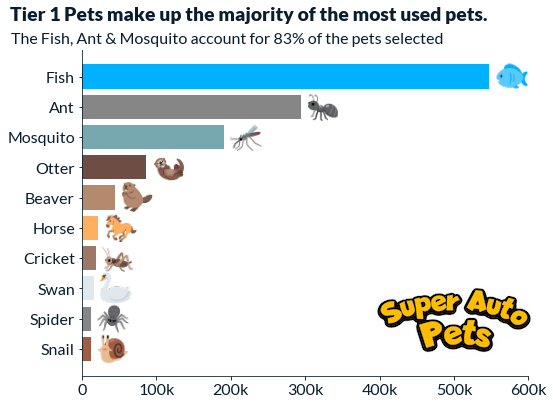

In [300]:
# Create figure and plot
fig, ax = plt.subplots(1,1, figsize=(8, 6))

# Set font family globally
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Lato']
rcParams['font.size'] = 16
rcParams['font.weight'] = 'regular'
rcParams["figure.titleweight"] = 'black'

# Plot bars
ax.barh(data=data.sort_values(by="times_used"), 
        y="pet", 
        width="times_used", 
        color=["#A05D43", "#868686", "#E1E8ED", "#9C7866", "#FEAF5F", "#B38A6D", "#6E4D44", "#77A8AF", "#868686", "#00B1FF"])

# Style Chart
ax.set_yticklabels(data.sort_values(by="times_used").pet.apply(str.capitalize), color="#081E2E")
ax.set_xticklabels(["0", "100k", "200k", "300k", "400k", "500k", "600k"], color="#081E2E")
ax.set_xlim(0,600000)
ax.set_title("The Fish, Ant & Mosquito account for 83% of the pets selected", 
             horizontalalignment="left", x=-0.16, color="#081E2E", size="medium")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color("#081E2E")
ax.spines['bottom'].set_color("#081E2E")

# Add Pet Icons
def add_pet_image(pet_name, times_used, index):
    img = mpimg.imread(f'images/{pet_name}.png')
    imagebox = OffsetImage(img, zoom=0.9)
    abox = AnnotationBbox(imagebox, (times_used + 30000, 9 - index), frameon=False)
    ax.add_artist(abox)

data.apply(lambda row: add_pet_image(row.pet, row.times_used, row.name), axis=1)

# Add Logo
img_logo = mpimg.imread('images/logo.png')
imagebox_logo = OffsetImage(img_logo, zoom=1)
abox_logo = AnnotationBbox(imagebox_logo, (500000, 1), frameon=False)
ax.add_artist(abox_logo)




# Figure Styling
fig.suptitle("Tier 1 Pets make up the majority of the most used pets.", horizontalalignment="left", x=0, color="#081E2E")

fig.savefig('sap_bar.png')
fig.show()